In [1]:
# Cell 1 – imports & paths

from fastai.vision.all import *
from pathlib import Path

root = Path("../")            # project root when notebook lives in notebooks/
data_path = root / "data"
data_path.mkdir(exist_ok=True)
data_path

Path('../data')

In [4]:
# Cell 2 – set up class folders 

from fastcore.all import L

def make_class_dir(name: str):
    # safe folder name
    folder = "_".join(name.split())[:30]
    dest = data_path / "forest" / folder
    dest.mkdir(parents=True, exist_ok=True)
    return dest

labels = [
    "giant sequoia forest",
    "pine forest",
    "oak forest",
   
]

for label in labels:
    dest = make_class_dir(label)
    print("Folder for:", label, "->", dest)



Folder for: giant sequoia forest -> ../data/forest/giant_sequoia_forest
Folder for: pine forest -> ../data/forest/pine_forest
Folder for: oak forest -> ../data/forest/oak_forest


In [5]:
# Cell 3 – cleanup corrupt images (optional but recommended)

failed = verify_images(get_image_files(data_path / "forest"))
failed.map(Path.unlink)
len(failed)

0

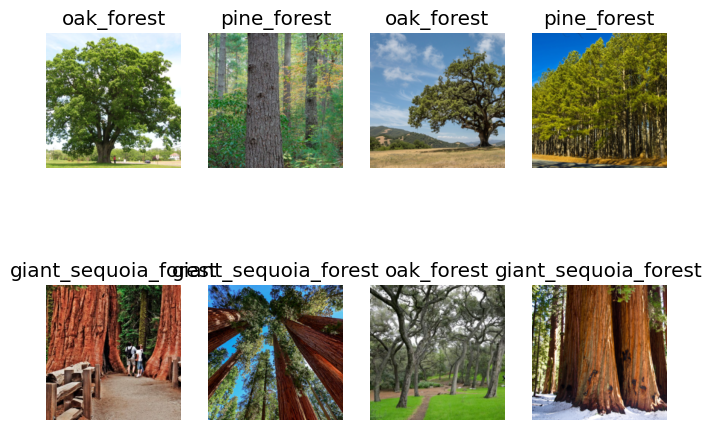

In [6]:
# Cell 4 – 3.1 Create DataLoaders

dls = ImageDataLoaders.from_folder(
    data_path / "forest",
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224)
)

dls.show_batch(max_n=8, figsize=(8, 6))

In [13]:
# Cell 5 – 3.2 Create learner & train 

learn = vision_learner(
    dls,
    resnet34,
    metrics=accuracy,
    pretrained=False   
)
learn.fine_tune(15)


epoch,train_loss,valid_loss,accuracy,time
0,2.218222,24.031496,0.388889,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.726500,5.905993,0.222222,00:03
1,1.697878,1.959840,0.111111,00:03
2,1.770875,1.293701,0.444444,00:04
3,1.692274,1.321209,0.333333,00:04
4,1.589486,1.291204,0.333333,00:03
5,1.520909,1.164562,0.277778,00:03
6,1.487224,1.095112,0.555556,00:03
7,1.411804,1.135967,0.333333,00:04
8,1.423479,1.292588,0.222222,00:03
9,1.396343,1.335614,0.166667,00:03


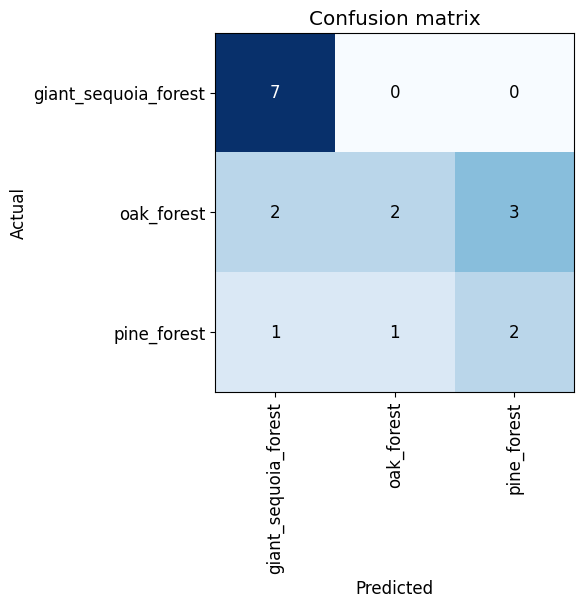

In [14]:
#confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6, 6))

In [16]:
# Cell 6 – 3.3 Export the model into models/

import shutil

# 1) Make sure project-level models/ exists
models_path = root / "models"
models_path.mkdir(exist_ok=True)

# 2) Let fastai export to its default location: learn.path / 'export.pkl'
learn.export()  # creates export.pkl under learn.path

# 3) Copy that file into project-level models/ with a nicer name
src = learn.path / "export.pkl"
dst = models_path / "forest_classifier.pkl"
shutil.copy(src, dst)

dst



Path('../models/forest_classifier.pkl')